In [4]:
import glob
import re
import pandas as pd
import matplotlib.pyplot as plt

file_paths = glob.glob('case*.txt')
data = []

for file_path in file_paths:
    with open(file_path, 'r') as file:
        lines = file.readlines()
        for line in lines:
            match = re.search(r'(\d+시 \d+분 \d+초)\s+all.*?(\d+\.\d+)$', line)
            if match:
                time = match.group(1)
                idle_cpu_usage = float(match.group(2))
                data.append([time, idle_cpu_usage])

df = pd.DataFrame(data, columns=['Time', 'cpu usage'])
csv_file_path = 'case1.csv'
df.to_csv(csv_file_path, index=False)

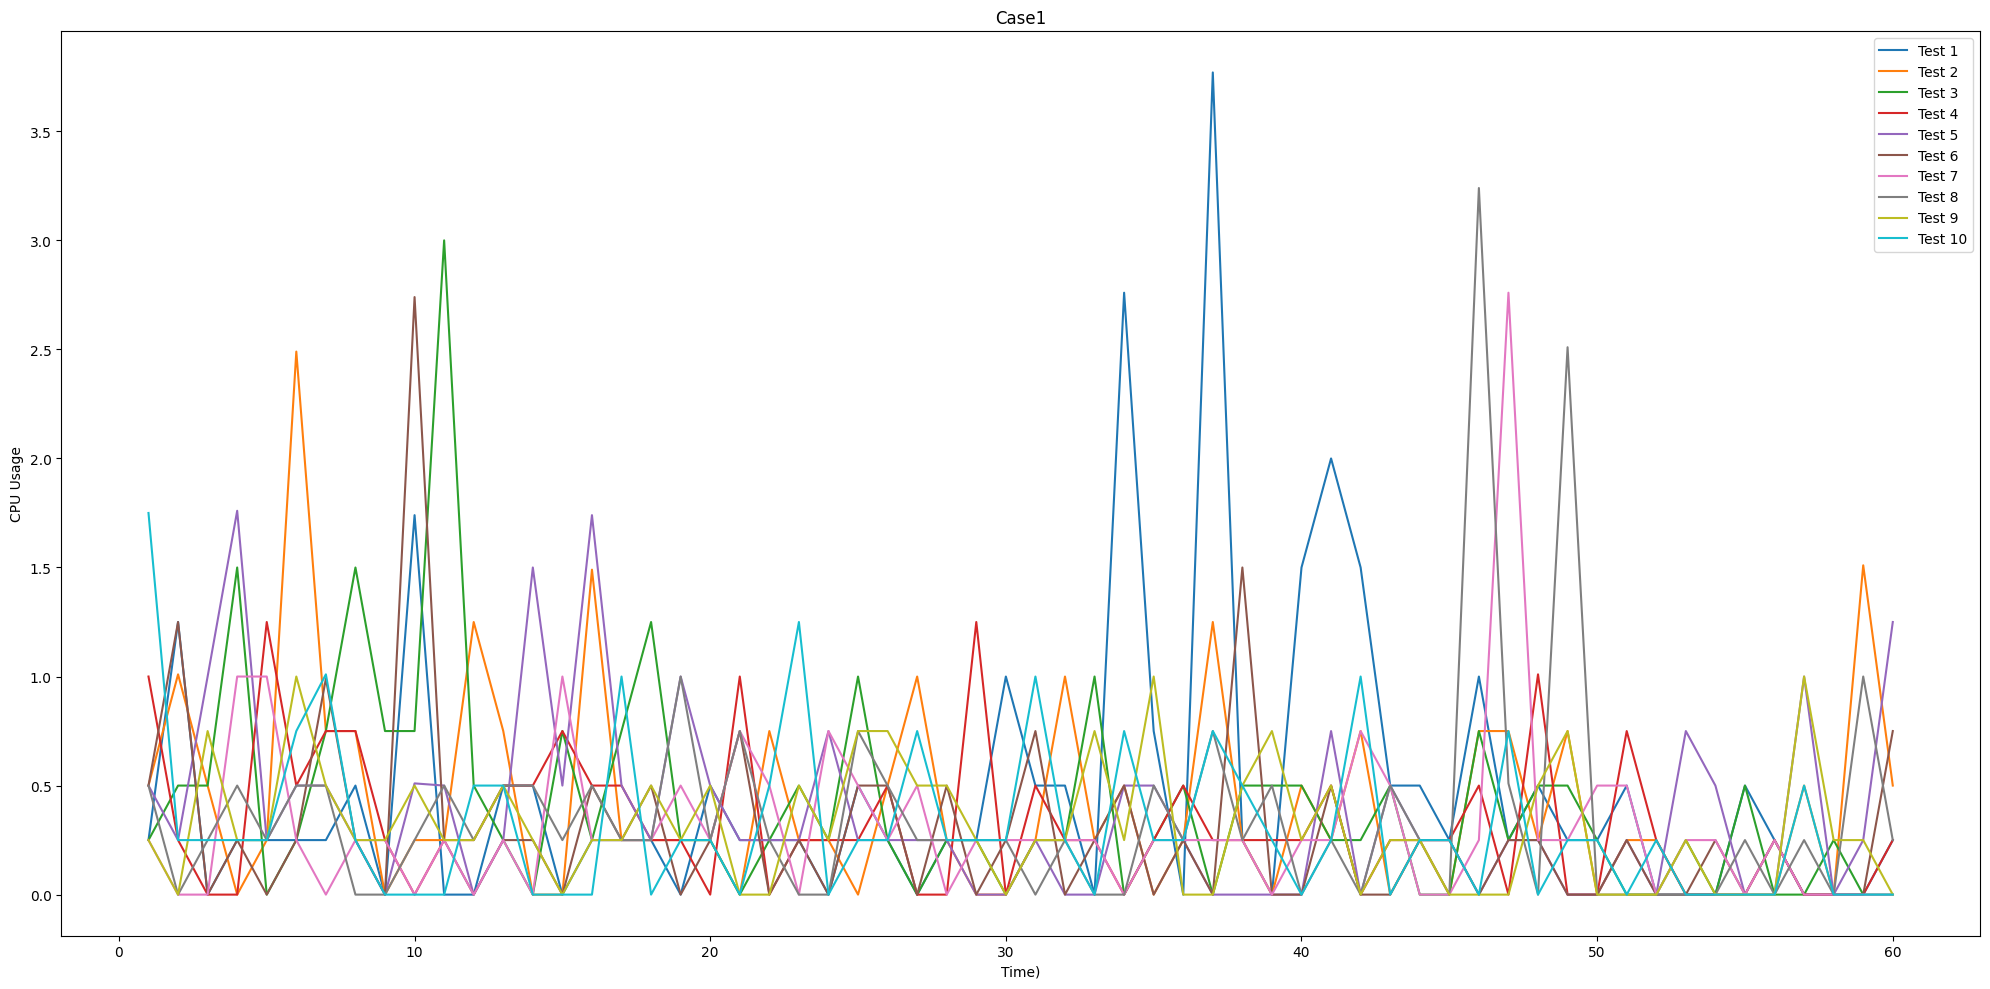

In [5]:
df = pd.read_csv('case1.csv')
test = [df[i:i + 60] for i in range(0, df.shape[0], 60)]

plt.figure(figsize=(20, 10))
for index, chunk in enumerate(test):
    plt.plot(range(1, len(chunk) + 1), 100 - chunk['cpu usage'], label=f'Test {index + 1}')

plt.xlabel('Time)')
plt.ylabel('CPU Usage')
plt.title('Case1')
plt.legend()
plt.tight_layout()
plt.show()


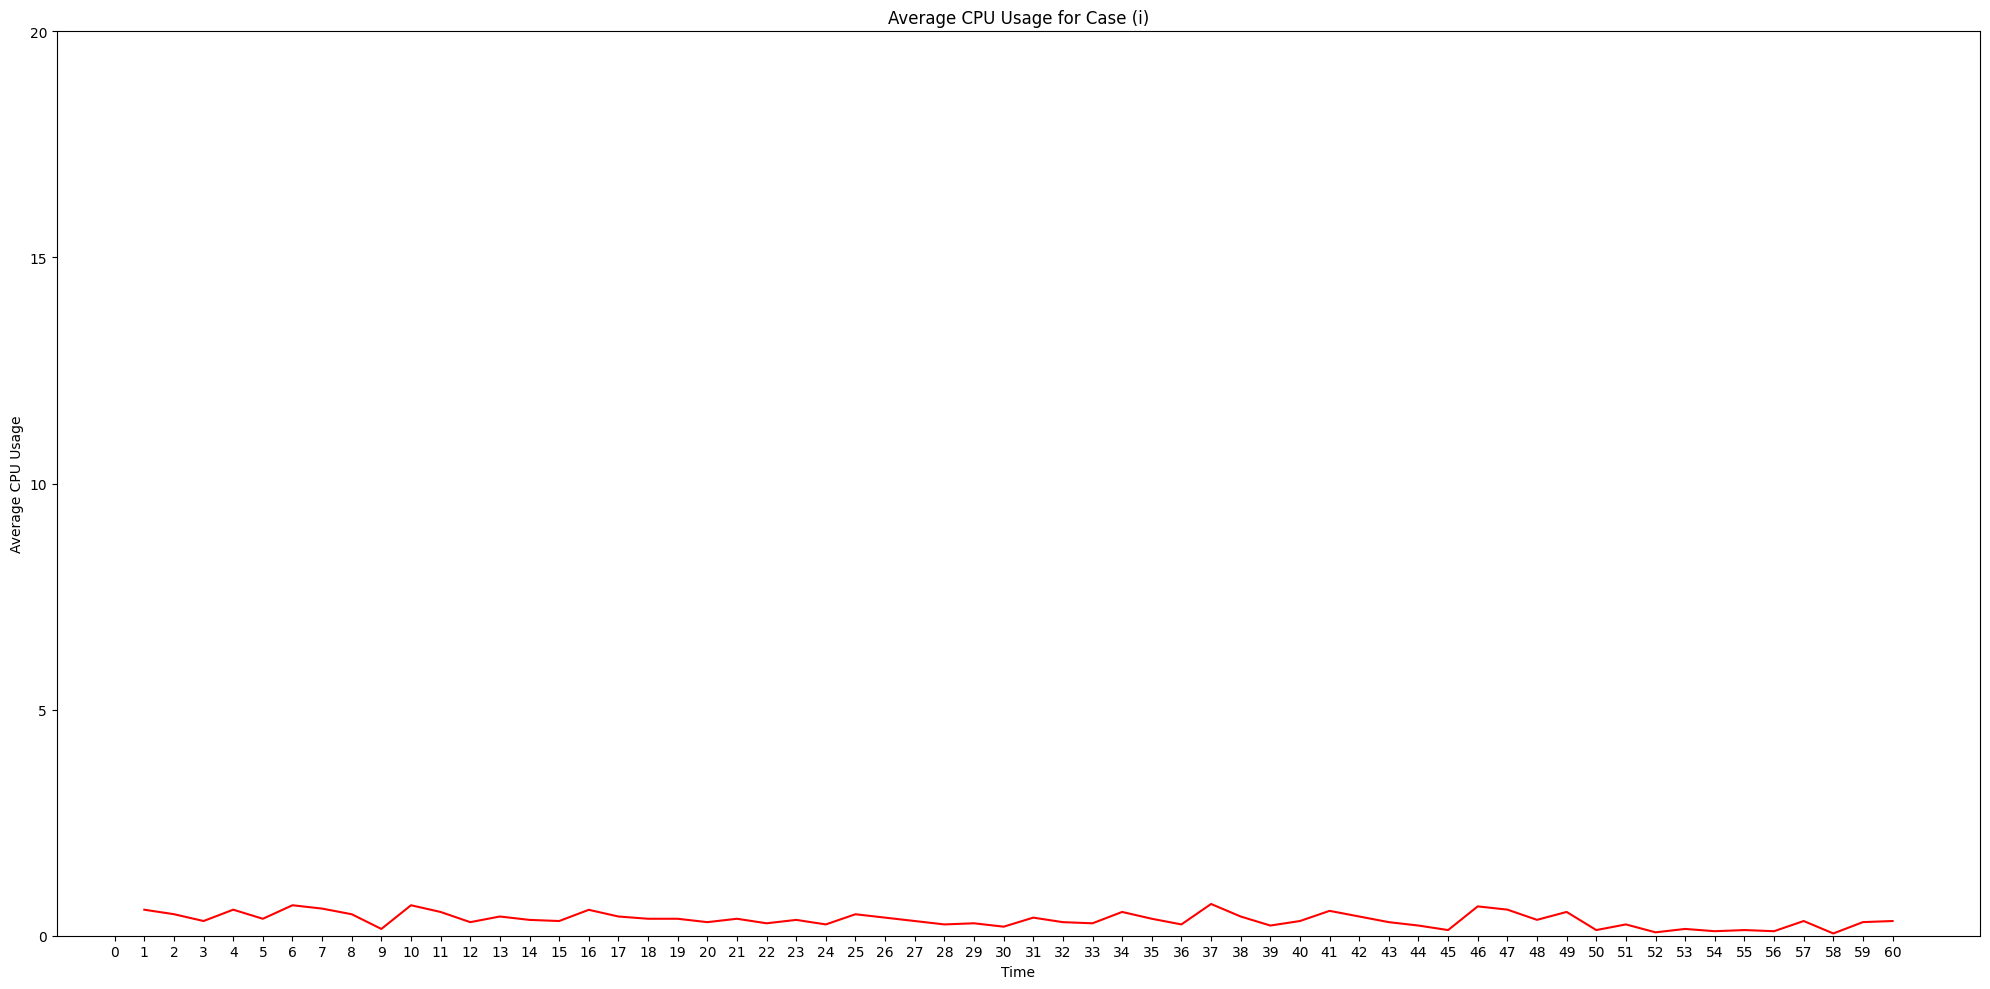

In [6]:
means = [100 - df['cpu usage'][i::60].mean() for i in range(60)]

plt.figure(figsize=(20, 10))
plt.plot(range(1, 61), means, color='red')
plt.xlabel('Time')
plt.ylabel('Average CPU Usage')
plt.title('Average CPU Usage for Case (i)')
plt.xticks(range(0, 61, 1))
plt.yticks(range(0, 25, 5))
plt.tight_layout()
plt.show()
